In [2]:
# 1.Write a Python script in a Jupyter Notebook to load this data using NumPy. 

import numpy as np

# Read the CSV file and use the first row as column names
fluor_data = np.genfromtxt('fluorescence_data.csv', delimiter=',', names=True)

# Access columns by their names (matches the CSV column headers)
time = fluor_data['time_min']
fluorescence = fluor_data['fluorescence']

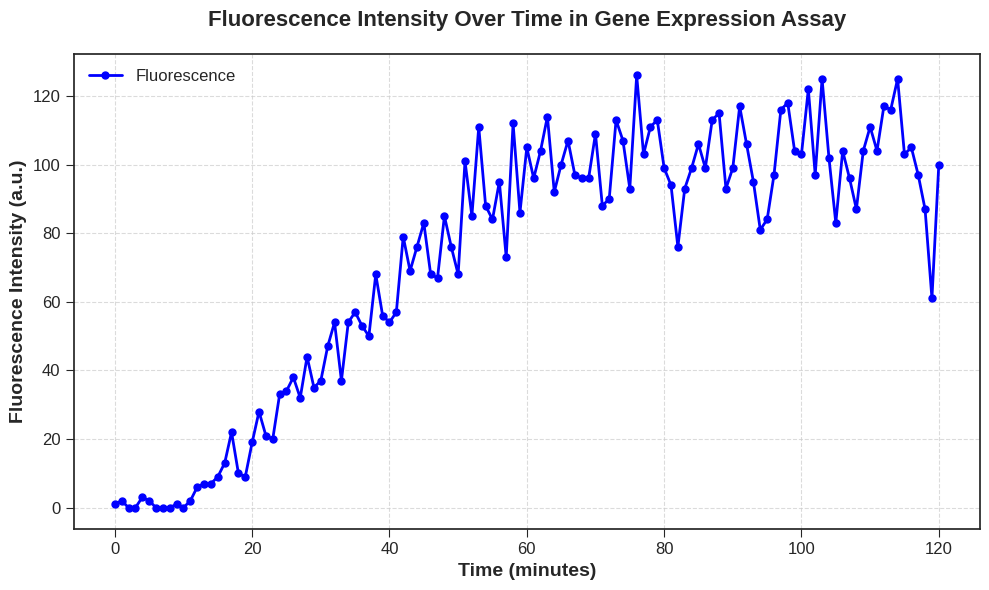

In [3]:
# 2.Create a publication-quality plot of Fluorescence vs. Time using Matplotlib. 
# Ensure your axes are clearly labeled with units, and the plot has an informative title. 

import matplotlib.pyplot as plt
import pandas as pd

# Set default plot style for publication quality
plt.style.use('seaborn-v0_8-ticks')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(time, fluorescence, 'b-', linewidth=2, marker='o', markersize=5, label='Fluorescence')

# Add labels and title
ax.set_xlabel('Time (minutes)', fontsize=14, fontweight='bold')
ax.set_ylabel('Fluorescence Intensity (a.u.)', fontsize=14, fontweight='bold')
ax.set_title('Fluorescence Intensity Over Time in Gene Expression Assay', 
             fontsize=16, fontweight='bold', pad=20)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=12)

# Adjust layout to prevent clipping
plt.tight_layout()

In [4]:
# 3.Calculate the following metrics and print them to the screen with clear descriptions: 
#   The maximum fluorescence level reached. 
#   The time at which this maximum is reached. 
#   The average rate of fluorescence increase between t=10 and t=60 minutes. 
#   The standard deviation of the data between t=10 and t=60 mins.

# 1. Maximum fluorescence level and its time
max_fluorescence = np.max(fluorescence)
max_time = time[np.argmax(fluorescence)]

# 2. Calculate metrics between t=10 and t=60 minutes
mask = (time >= 10) & (time <= 60)
time_subset = time[mask]
fluorescence_subset = fluorescence[mask]

# Average rate of fluorescence increase
if len(time_subset) >= 2:
    # Calculate using first and last points in the range
    rate_increase = (fluorescence_subset[-1] - fluorescence_subset[0]) / (time_subset[-1] - time_subset[0])
else:
    rate_increase = np.nan  # Not enough data points

# Standard deviation
std_dev = np.std(fluorescence_subset)

# Print the results with clear descriptions
print("=============== Fluorescence Data Metrics ===============")
print(f"1. Maximum fluorescence level reached: {max_fluorescence:.2f} a.u.")
print(f"2. Time at which maximum fluorescence occurs: {max_time:.1f} minutes")
print(f"3. Average rate of fluorescence increase (t=10 to t=60 min): {rate_increase:.4f} a.u./min")
print(f"4. Standard deviation of fluorescence (t=10 to t=60 min): {std_dev:.2f} a.u.")

=============== Fluorescence Data Metrics ===============
1. Maximum fluorescence level reached: 126.00 a.u.
2. Time at which maximum fluorescence occurs: 76.0 minutes
3. Average rate of fluorescence increase (t=10 to t=60 min): 2.1000 a.u./min
4. Standard deviation of fluorescence (t=10 to t=60 min): 31.13 a.u.


**The plot above shows the fluorescence intensity measured over time, which serves as a proxy for gene expression levels in the assay.**

The calculated metrics provide valuable insights:
- The maximum fluorescence level, 126 a.u., indicates the peak expression of the gene during the observed period.
- The peak expression occurs at 76 min, which could correspond to the optimal activation time of the gene.
- The average rate of increase between 10-60 minutes, 2.1000 a.u./min, demonstrates how quickly the gene is being expressed during this window.
- The standard deviation between 10-60 minutes, 31.13 a.u., indicates the variability or noise in the measurements.

Together, these metrics help characterize the dynamics of gene expression, including activation speed, peak levels, and expression stability.